In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
features = pd.read_excel('features_1.xlsx')
features = features.drop(columns=['Unnamed: 0'])
conditions = [
    (features['Label'] == 0),
    (features['Label'] == 1),
    (features['Label'] == 2),
    (features['Label'] == 3),
    (features['Label'] == 4),
    (features['Label'] == 5)]
choices = ['Quebra', 'Inclusão', 'Manchas', 'Corrosão Superficial por Pite', 'Carepa Incrustada', 'Marcas Superficiais']
features['defeitos'] = np.select(conditions, choices)

In [ ]:
X = features.iloc[:,0:5]

#X = X.T
#X = preprocessing.normalize(X)
#X = X.T
Y = features.iloc[:,-1]
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.2, random_state = 3)

#X_padrao = StandardScaler().fit(X_treino)
#X_treino = X_padrao.transform(X_treino)
#X_teste = X_padrao.transform(X_teste)

RandomForest = RandomForestClassifier(n_estimators = 100, max_depth=100, random_state = 9)
RandomForest.fit(X_treino, Y_treino)
testt = RandomForest.predict(X_teste)
scoree = accuracy_score(Y_teste, testt)
print("Random Forest testing accuracy=",scoree*100)

Random Forest testing accuracy= 92.5


In [ ]:
X = features.iloc[:,0:5]

#X = X.T
#X = preprocessing.normalize(X)
#X = X.T
Y = features.iloc[:,-1]
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.2, random_state = 3)

#X_padrao = StandardScaler().fit(X_treino)
#X_treino = X_padrao.transform(X_treino)
#X_teste = X_padrao.transform(X_teste)

RandomForest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, verbose=0, warm_start=False, random_state = 9)
RandomForest.fit(X_treino, Y_treino)
testt = RandomForest.predict(X_teste)
scoree = accuracy_score(Y_teste, testt)
print("Random Forest testing accuracy=",scoree*100)

Random Forest testing accuracy= 91.38888888888889


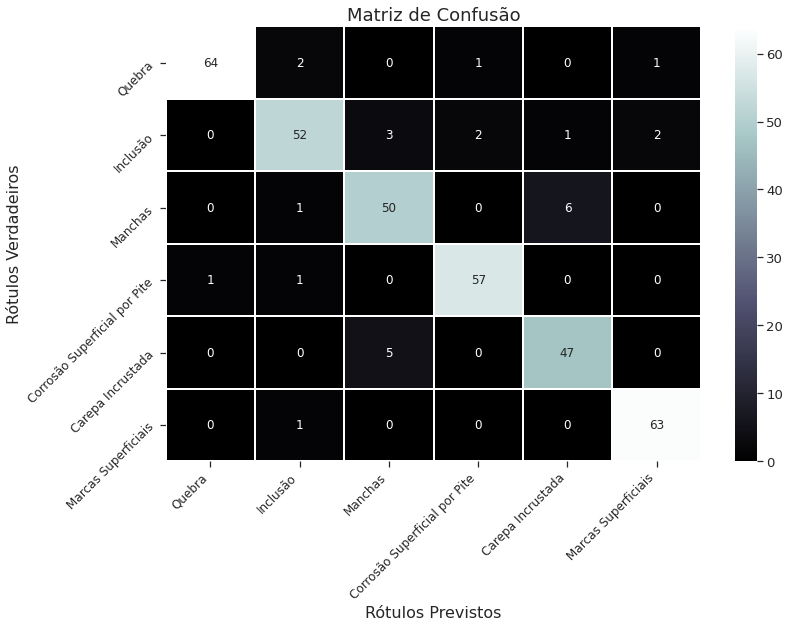

In [ ]:
import matplotlib.pyplot as plt

pred = RandomForest.predict(X_teste)

c_matrix = confusion_matrix(pred, Y_teste)

ax = plt.subplot()
sns.set(style="ticks", color_codes=True, rc={"figure.figsize": (12, 8)}, font_scale=1.2)
sns.heatmap(c_matrix, annot=True, ax = ax, annot_kws={"size": 12}, linewidths=1, cmap = "bone");
ax.set_xlabel('Rótulos Previstos', size = '16'); ax.set_ylabel('Rótulos Verdadeiros', size = '16');
ax.set_title('Matriz de Confusão', size = '18')
ax.xaxis.set_ticklabels(choices, rotation = 45, ha = 'right'); ax.yaxis.set_ticklabels(choices, rotation = 45);

In [ ]:
importances = pd.DataFrame({'Característica':X_treino.columns, 'Importância': np.round(RandomForest.feature_importances_, 3)})

In [ ]:
importances.head(5)

,Característica,Importância
0,contrast,0.232
1,dissimilarity,0.226
2,homogeneity,0.250
3,ASM,0.147
4,energy,0.144


In [ ]:
importances2= importances.sort_values('Importância', ascending = False)
importances2

,Característica,Importância
2,homogeneity,0.250
0,contrast,0.232
1,dissimilarity,0.226
3,ASM,0.147
4,energy,0.144


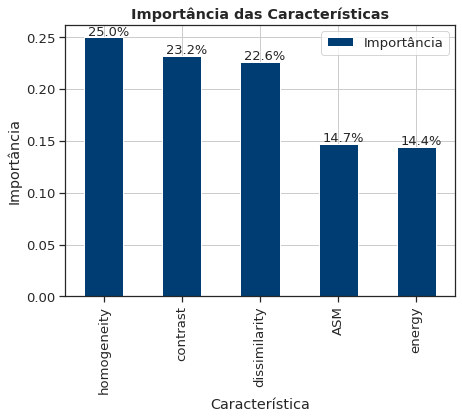

In [ ]:
importances2= importances.sort_values('Importância', ascending = False)
importances2

ax = importances2.plot(kind='bar', grid=True, figsize=(7,5), color = '#003d72')
ax.set_axisbelow(True)
plt.title("Importância das Características", fontweight='bold', fontname ='Segoe UI')

# plt.rc('font', size=20)                # controls default text sizes
plt.rc('axes', titlesize=16)             # fontsize of the axes title
plt.rc('axes', labelsize=14)             # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)            # fontsize of the tick (eixo) labels
plt.rc('ytick', labelsize=12)            # fontsize of the tick (eixo) labels
plt.rc('legend', fontsize=12)            # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#rot_y=[]
x = np.linspace(-0.2, 3.8, 5, endpoint=True)
for i in range(len(importances2)):
    rot = round(np.array(importances2)[i,1]*100 ,2)
    plt.text(x[i],np.array(importances2)[i,1]+0.002,str(rot)+"%", size = 13, fontname ='Arial')
    #rot_y.append(rot2)
    #print(rot_y)
    
#ax.set_yticklabels(str(rot2))
ax.set_xlabel('Característica', fontname ='Segoe UI')
ax.set_ylabel('Importância', fontname ='Segoe UI')
#ax.set_xticks(positions)

#ax.set_xticks(rot)
ax.set_xticklabels(importances2['Característica'], fontname ='Segoe UI')
#ax.set_yticklabels = (rot_y)
#print (ax.set_xticklabels)

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 200, 300, 400, 500, 700, 850, 1000],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [10, 30, 50, 70],
    'min_samples_leaf' : [1, 3, 5, 6, 7],
    'min_samples_split': [1, 5, 9, 13, 15],
}
grid_RF = GridSearchCV(estimator = RandomForestClassifier(),
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 4, 
                        verbose = 1,
                        n_jobs = -1)
grid_RF.fit(X_treino, Y_treino)
grid_RF.best_estimator_
testt2=grid_RF.predict(X_teste)
scoree2=accuracy_score(Y_teste, testt2)
print("Random Forest testing accuracy=",scoree2*100)

Fitting 4 folds for each of 1600 candidates, totalling 6400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 25.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 64.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 105.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 159.3min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 221.6min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 297.7min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 388.5min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 530.3min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 714.1min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 928.0min
[Parallel(n_jobs=-1)]: Done 6400 out of 6400 | elapsed: 991.0min finished


Random Forest testing accuracy= 87.5


In [ ]:
grid_RF.best_estimator_

RandomForestClassifier(max_depth=70, min_samples_split=5, n_estimators=200)

In [ ]:
grid_RF

GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 30, 50, 70],
                         'min_samples_leaf': [1, 3, 5, 6, 7],
                         'min_samples_split': [1, 5, 9, 13, 15],
                         'n_estimators': [100, 200, 300, 400, 500, 700, 850,
                                          1000]},
             scoring='accuracy', verbose=1)

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [100, 150, 200, 250, 300, 350, 400],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [50, 60, 70, 80, 90, 100, 200],
    'min_samples_leaf' : [1, 3, 5, 6, 7],
    'min_samples_split': [3, 4,  5, 6, 7, 8, 9, 10],
}
grid_RF = GridSearchCV(estimator = RandomForestClassifier(),
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 4, 
                        verbose = 1,
                        n_jobs = -1)
grid_RF.fit(X_treino, Y_treino)
grid_RF.best_estimator_
testt2=grid_RF.predict(X_teste)
scoree2=accuracy_score(Y_teste, testt2)
print("Random Forest testing accuracy=",scoree2*100)

Fitting 4 folds for each of 3920 candidates, totalling 15680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 17.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 35.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 59.5min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 91.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 129.4min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 185.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 241.4min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 300.6min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 367.0min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 440.2min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 519.7min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 628.1min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 775.3min
[Parallel(n_jobs=-1)]: Done 11242 tas

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [50, 60, 70, 80, 90, 100, 200],
    'min_samples_leaf' : [1, 3, 5, 6, 7, 9, 10],
    'min_samples_split': [3, 4,  5, 6, 7, 8, 9, 10],
}
grid_RF = GridSearchCV(estimator = RandomForestClassifier(),
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 4, 
                        verbose = 1,
                        n_jobs = -1)
grid_RF.fit(X_treino, Y_treino)
grid_RF.best_estimator_
testt2=grid_RF.predict(X_teste)
scoree2=accuracy_score(Y_teste, testt2)
print("Random Forest testing accuracy=",scoree2*100)

Fitting 4 folds for each of 6272 candidates, totalling 25088 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 23.9min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 30.3min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 53.7min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 63.3min
[Parallel(n_jobs=-1)]: Done 9796 tasks      | elapsed: 73.3min
[Parallel(n_jobs=-1)]: Done 11246 tasks      |

Random Forest testing accuracy= 91.11111111111111


In [ ]:
grid_RF.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=70, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)